<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/data_analysis_for_heart_disease(Age_vs_Thalach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data_Cleanup**

In [1]:
import numpy as np # 수치 연산
import pandas as pd # 데이터생성을 위한 라이브러리

# 데이터 시각화에 필요한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

#
import missingno as msno

#warning 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df_heart=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [14]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#null값 확인 null값 없음
for col in df_heart.columns:
  msg='column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100 * (df_heart[col].isnull().sum()/ df_heart[col].shape[0]))
  print(msg)

column:        age	 Percent of Nan value: 0.00%
column:        sex	 Percent of Nan value: 0.00%
column:         cp	 Percent of Nan value: 0.00%
column:   trestbps	 Percent of Nan value: 0.00%
column:       chol	 Percent of Nan value: 0.00%
column:        fbs	 Percent of Nan value: 0.00%
column:    restecg	 Percent of Nan value: 0.00%
column:    thalach	 Percent of Nan value: 0.00%
column:      exang	 Percent of Nan value: 0.00%
column:    oldpeak	 Percent of Nan value: 0.00%
column:      slope	 Percent of Nan value: 0.00%
column:         ca	 Percent of Nan value: 0.00%
column:       thal	 Percent of Nan value: 0.00%
column:     target	 Percent of Nan value: 0.00%


<function matplotlib.pyplot.show>

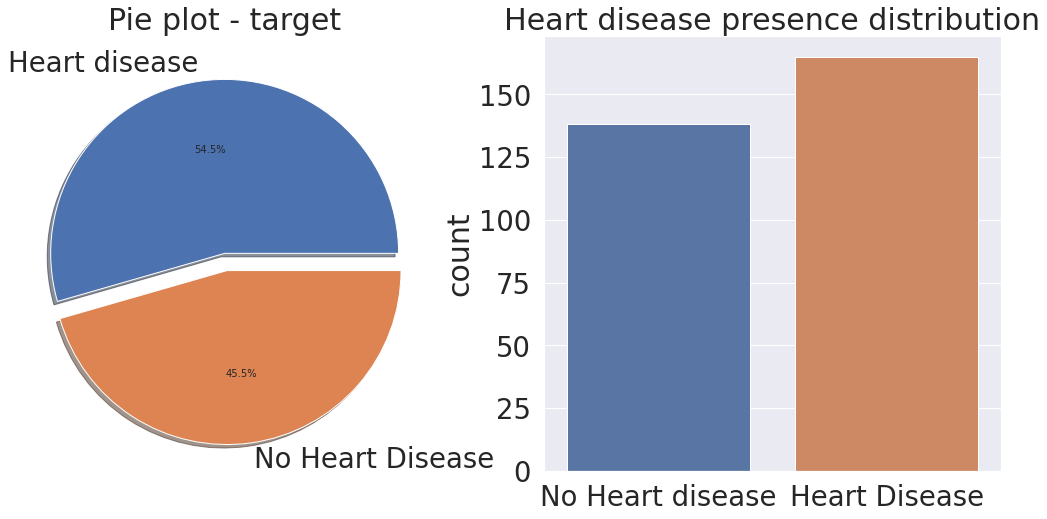

In [17]:
f, ax=plt.subplots(1,2,figsize=(18,8))

df_heart['target'].value_counts().plot.pie(explode=[0,0.1],labels=["Heart disease",'No Heart Disease'],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - target')
ax[0].set_ylabel('')
f=sns.countplot(x='target',data=df_heart)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(["No Heart disease",'Heart Disease'])
plt.xlabel("")
plt.show

# Age vs Target

In [67]:
print("가장 나이 많은사람 : {:.1f} Years".format(df_heart[df_heart['target']==1]['age'].max()))
print("가장 나이 적은사람 : {:.1f} Years".format(df_heart[df_heart['target']==1]['age'].min()))
print("나이 평균 : {:.1f} Years".format(df_heart[df_heart['target']==1]['age'].mean()))

가장 나이 많은사람 : 76.0 Years
가장 나이 적은사람 : 29.0 Years
나이 평균 : 52.5 Years


[Text(0, 0.5, 'total'), Text(0.5, 0, 'age')]

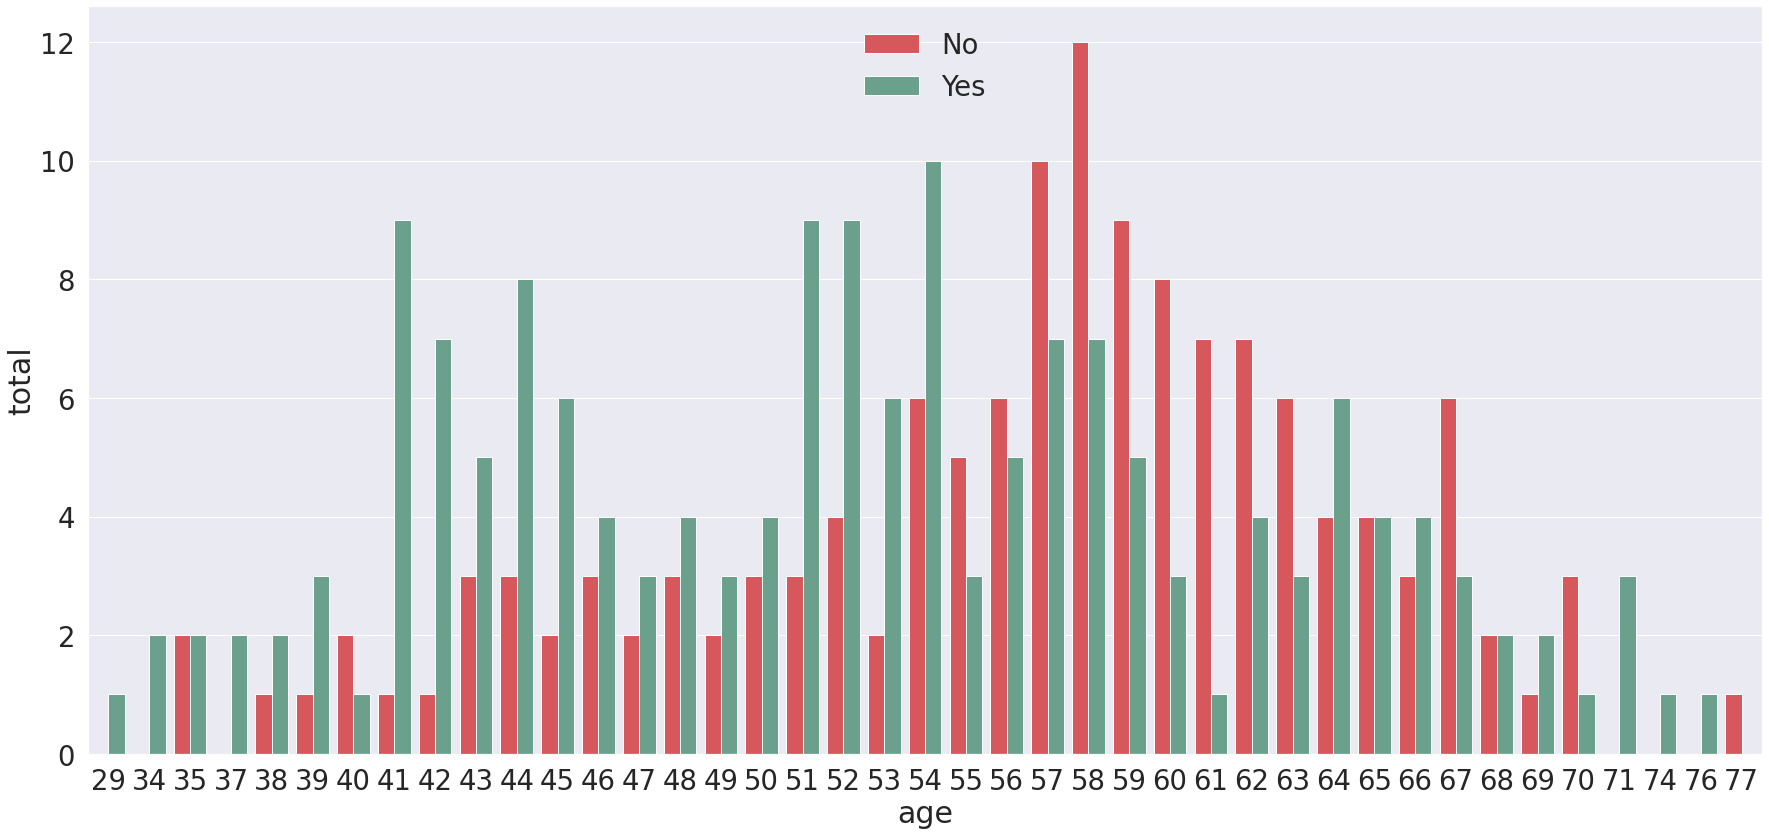

In [19]:
df_heart['age']=df_heart['age'].apply(lambda h: round(h))

fig=plt.figure(figsize=(30, 5.5/8*20))
ax = sns.countplot(x='age', 
                   hue='target', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data=df_heart)
plt.legend(['No','Yes'])
ax.set(xlabel='age', ylabel='total')

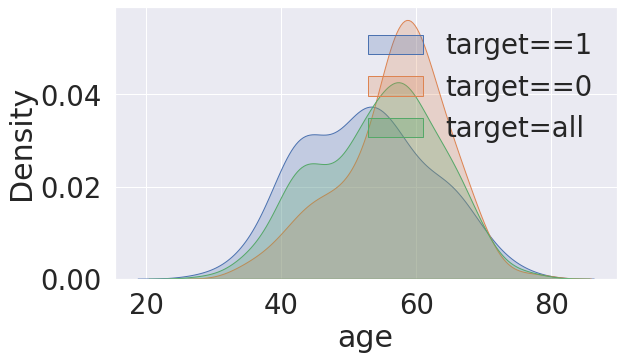

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_heart[df_heart['target']==1]['age'],shade=True,ax=ax)
sns.kdeplot(df_heart[df_heart['target']==0]['age'],shade=True,ax=ax)
sns.kdeplot(df_heart['age'],shade=True)
plt.legend(['target==1','target==0','target=all'])
plt.show()

In [21]:
df_heart[['age', 'target']].groupby('target', as_index=True).mean()

,age
target,
0,56.601449
1,52.496970


In [68]:
df_heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

- **나이가 많아 질 수록 심장질환을 더 많이 가지고 있다는 예상과는 조금 다르게 40대 초반 50대 초반이 심장질환을 많이 가지고 있습니다. 이는 심장의 기능이 악화되는 것이 이유인데, 데이터가 45~63세 사이가 많기 때문에 데이터 부족으로 60대는 감소하는 것 처럼 보입니다.**
- **특히 50대가 가장 높으며 이는 심장질환이 걸릴 때의 평균나이를 통해 알 수 있습니다.**

# **Thalach(최대 심박동수) Vs Target**

In [42]:
print("심박동수 최대 환자 : {:.1f} bpm".format(df_heart[df_heart['target']==1]['thalach'].max()))
print("심박동수 최소 환자 : {:.1f} bpm".format(df_heart[df_heart['target']==1]['thalach'].min()))
print("환자의 심박동수 평균 : {:.1f} bpm".format(df_heart[df_heart['target']==1]['thalach'].mean()))

심박동수 최대 환자 : 202.0 bpm
심박동수 최소 환자 : 96.0 bpm
환자의 심박동수 평균 : 158.5 bpm


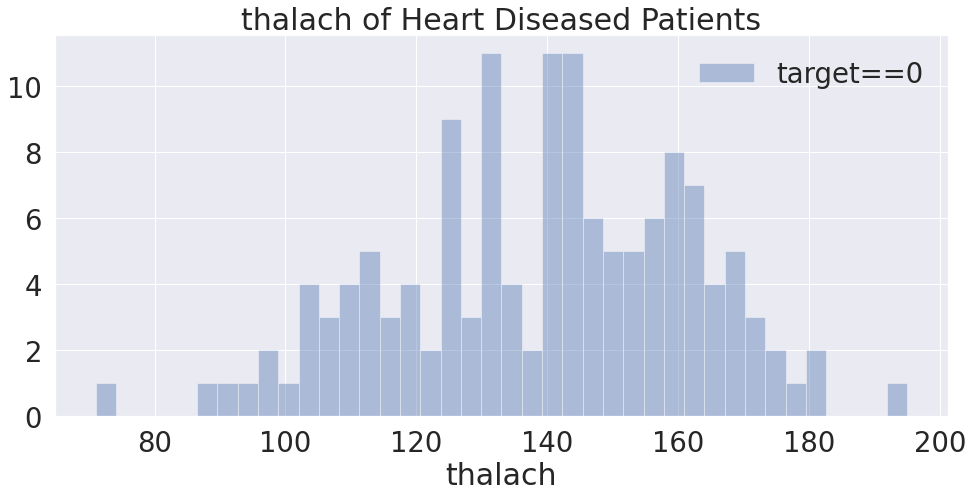

In [44]:
plt.figure(figsize=(16,7))
sns.distplot(df_heart[df_heart['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients')
plt.legend(['target==0'])

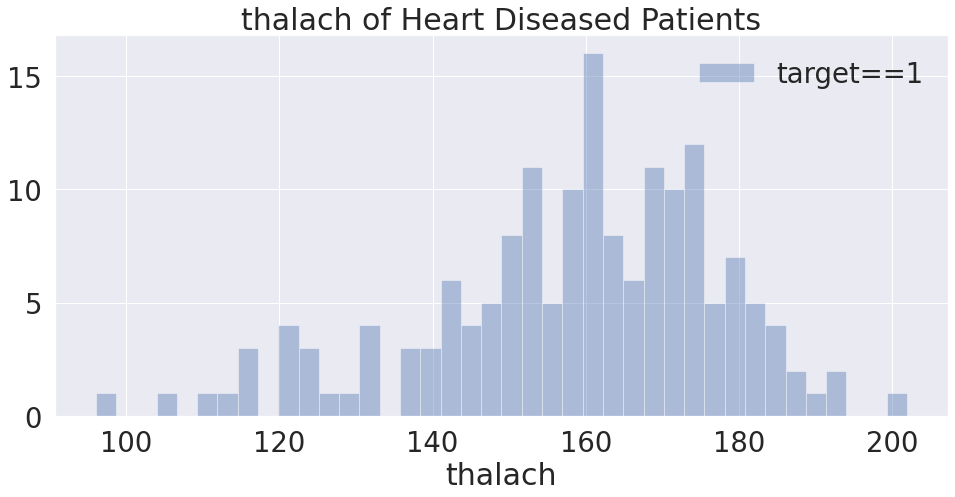

In [45]:
plt.figure(figsize=(16,7))
sns.distplot(df_heart[df_heart['target']==1]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients')
plt.legend(['target==1'])

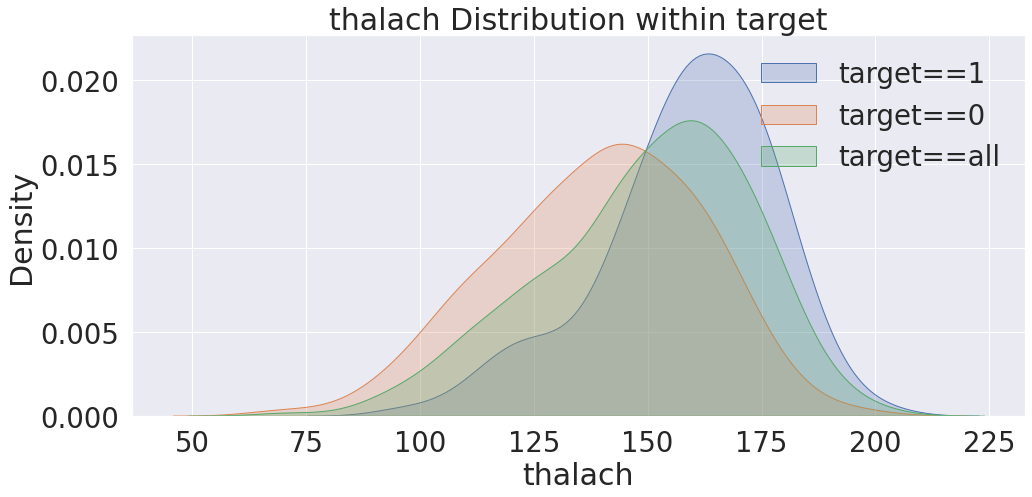

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))
sns.kdeplot(df_heart[df_heart['target']==1]['thalach'],shade=True,ax=ax)
sns.kdeplot(df_heart[df_heart['target']==0]['thalach'],shade=True,ax=ax)
sns.kdeplot(df_heart['thalach'],shade=True)
plt.title('thalach Distribution within target')
plt.legend(['target==1','target==0','target==all'])
plt.show()

In [47]:
df_heart['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

- **심박동수도 140~180대가 많으며 특히 150대에서 160대까지 급격하게 상승하는 것을 알 수 있습니다. 이는 최대심박동수가 특정 범위에서 심장병 환자가 다수 나타난다는 의미입니다.**
- **하지만 심박동수는 개인 신체적 특성에 따라 다르기 때문에 최대심박동수는 다르다는 것을 고려해야 합니다. 하지만 평균치를 생각해 보았을 때 최대심박동수가 높을수록 심장병 발병환자가 많습니다.**

#**conclusion**

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

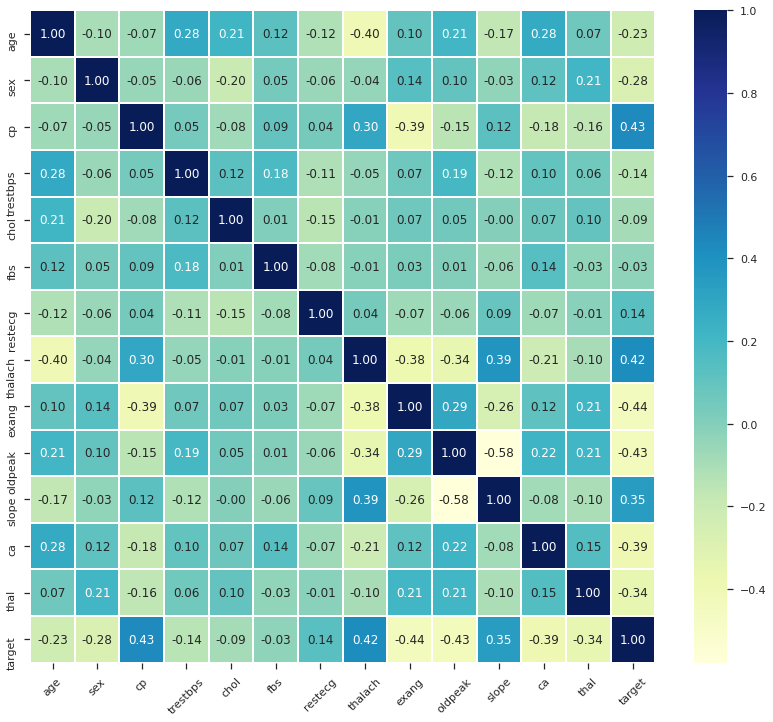

In [66]:
sns.set(style='ticks',color_codes=True)
plt.figure(figsize=(14,12))
heat_map=sns.heatmap(df_heart.corr(method='pearson'),annot=True,fmt='.2f',linewidths=1, cmap="YlGnBu")
heat_map.set_xticklabels(heat_map.get_xticklabels(),rotation=45)

- **target과 age 그리고 thalach를 고려하여 분석을 하였는데 심장병 발병과 상관관계가 큰 요인을 히트맵으로 알 수 있습니다.**
- **age와 target은 상관관계가 -0.23**
- **thalach와 target은 상관관계가 0.42**
- **절댓값을 씌어 보았을 때 thalach와 target과의 관계가 더 크다는 것을 알 수 있습니다. 그래서 age보다는 thalach를 사용하는 것이 더 적합하다고 판단할 수 있습니다.**